In [1]:
from collections import defaultdict
import pandas


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [15]:
# stored select_k times from the 'generate_dataset.py' script
df = pandas.read_csv("./select_k_times.csv")
df = df.sort_values(by=["k", "row", "col"])
df = df.reset_index(drop=True)

In [16]:
df

,algo,k,row,col,time
0,RADIX,1,1,1024,0.000081
1,WARPSORT,1,1,1024,0.000087
2,BLOCK,1,1,1024,0.000062
3,AUTO,1,1,1024,0.000091
4,RADIX,1,1,2048,0.000083
...,...,...,...,...,...
25019,WARPSORT,16354,1160,2046908,inf
25020,BLOCK,16354,1160,2046908,inf
25021,RADIX,16363,119,366478,0.020900
25022,WARPSORT,16363,119,366478,inf


In [20]:
def generate_plot(df, x_axis="col", title=""):
    fig, ax = plt.subplots()
    for algo in ["AUTO", "RADIX", "BLOCK", "WARPSORT"]:
        current = df[(df.algo == algo) & (df.time < np.inf)]
        ax.plot(current[x_axis], current["time"], label=algo)
    ax.set_xscale('log', base=2)
    ax.set_yscale('log', base=2)
    ax.set_xlabel(x_axis)
    ax.set_ylabel("time(s)")
    ax.set_title(title)
    fig.legend()
    plt.show()

def generate_k_plot(df, col, row):
    return generate_plot(df[(df.col == col) & (df.row == row)], "k", f"#cols={col}, #rows={row}")

def generate_col_plot(df, row, k):
    return generate_plot(df[(df.row == row) & (df.k == k)], "col", f"#rows={row}, k={k}")

def generate_row_plot(df, col, k):
    return generate_plot(df[(df.col == col) & (df.k == k)], "row", f"#cols={col}, k={k}")

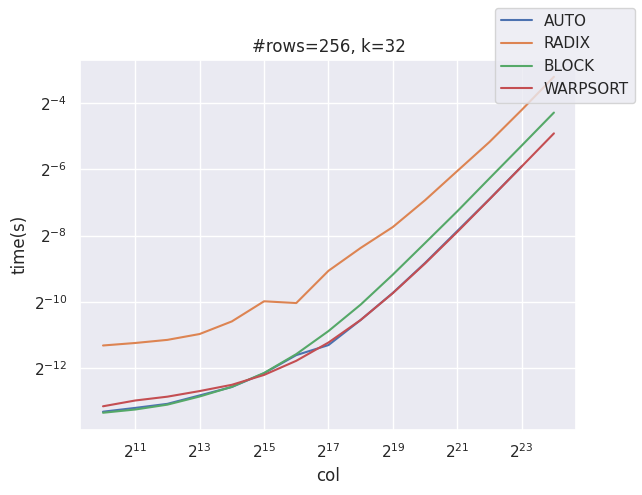

In [30]:
generate_col_plot(df, 256, 32)

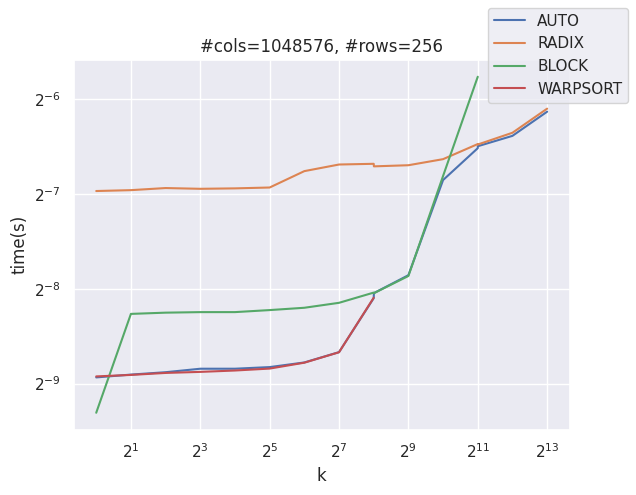

In [24]:
generate_k_plot(df, 2**20, 256)